# Quantum Game Theory - 8 Queen Problem

The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal. There are 92 solutions. The problem was first posed in the mid-19th century. In the modern era, it is often used as an example problem for various computer programming techniques.

The eight queens puzzle is a special case of the more general n queens problem of placing n non-attacking queens on an n×n chessboard. Solutions exist for all natural numbers n with the exception of n = 2 and n = 3. Although the exact number of solutions is only known for n ≤ 27, the asymptotic growth rate of the number of solutions is approximately (0.143 n)n. 

Chess composer Max Bezzel published the eight queens puzzle in 1848. Franz Nauck published the first solutions in 1850. Nauck also extended the puzzle to the n queens problem, with n queens on a chessboard of n×n squares

https://en.wikipedia.org/wiki/Eight_queens_puzzle

Coded by Y3TI & Sam Rahmeh

### Import Libraries

In [1]:
from util import constraint, displayBoard
from sympy import *
from IPython.display import display
import dimod
import dynex
from util import constraint, displayBoard
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
init_printing()
%matplotlib inline

### Compute on DYNEX

In [2]:
def NQueen2BQM(n):
    bqm = dimod.BinaryQuadraticModel('BINARY')
    for row in range(n):
        bqm.add_linear_equality_constraint(
            [(row * n + col, 1.0) for col in range(n)],
            constant=-1.0,
            lagrange_multiplier=n)
    for i in range(n):
        for j in range(n):
            if i < j:
                for k in range(n):
                    bqm.add_interaction(i * n + k, j * n + k, 2 * n)
                    if k + (j - i) < n:
                        bqm.add_interaction(i * n + k, j * n + (k + (j - i)), 2 * n)
                    if k - (j - i) >= 0:
                        bqm.add_interaction(i * n + k, j * n + (k - (j - i)), 2 * n)
    return bqm

def Visualize(board):
    n = len(board)
    cmap = mcolors.ListedColormap(['#f5ecce', '#614532'])
    img = mpimg.imread('nqueen/queen.png')
    fig, ax = plt.subplots()
    ax.matshow(np.add.outer(range(n), range(n)) % 2 == 0, cmap=cmap)
    plt.axis("off")  
    ax_width = ax.get_window_extent().width / ax.figure.dpi * fig.dpi
    ax_height = ax.get_window_extent().height / ax.figure.dpi * fig.dpi
    cell_size = min(ax_width, ax_height) / n
    img_height, img_width = img.shape[:2]
    scale_width = cell_size / img_width
    scale_height = cell_size / img_height
    scale = min(scale_width, scale_height)
    for r in range(n):
        for c in range(n):
            if board[r][c] == 'Q':
                box = offsetbox.OffsetImage(img, zoom=scale)
                ab = offsetbox.AnnotationBbox(box, (c, r), frameon=False)
                ax.add_artist(ab)
    scale_factor = 1.1  
    fig.set_size_inches(n * scale_factor, n * scale_factor)
    plt.show()
    return fig

def SolveNQueens(n):
    bqm = NQueen2BQM(n)
    model = dynex.BQM(bqm)
    sampler = dynex.DynexSampler(model, mainnet=False, description='Quantum 8 Queen Problem')
    sampleset = sampler.sample(num_reads=10000, annealing_time=500, debugging=False, alpha=10, beta=1)
    solution = sampleset.first.sample
    board = [['.' for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if solution[i * n + j] == 1:
                board[i][j] = 'Q'
    Visualize(board)

[DYNEX] 8 Queen Problem Solver
[DYNEX] SAMPLER INITIALISED
[DYNEX|TESTNET] *** WAITING FOR READS ***
╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬───────────────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │ ELAPSED   │ WORKERS READ              │ CIRCUITS   │ STEPS   │ GROUND STATE   │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼───────────────────────────┼────────────┼─────────┼────────────────┤
│         -1 │       72 │             800 │           0 │           │ *** WAITING FOR READS *** │            │         │                │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴───────────────────────────┴────────────┴─────────┴────────────────╯

[DYNEX] FINISHED READ AFTER 0.38 SECONDS
[DYNEX] SAMPLESET READY


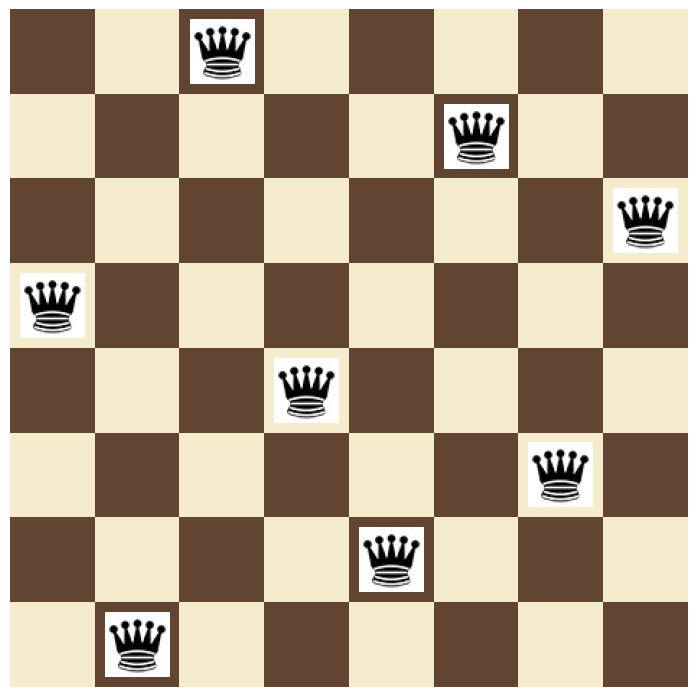

In [5]:
print("[DYNEX] 8 Queen Problem Solver")
n = 8
SolveNQueens(n)